In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy import stats
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression

In [152]:
df = pd.read_csv('../cleaned_datasets/train_cleaned.csv')
df.head()

,LotArea,TotalBsmtSF,1stFlrSF,GrLivArea,SalePrice,RegularLotShape,LandIsLvl,LotConfigCL,LotAdjacencyType,HouseCondition,...,HasHalfBath,Bedrooms,RemainingRooms,AdditionalRooms,NumFireplaces,GarageAreaByCar,HasDeck,HasPool,MonthSold,YearSold
0,8450,856,856,1710,208500,1,1,0,0,2,...,1,2,5,3,0,2,0,0,1,2
1,9600,1262,1262,1262,181500,1,1,3,1,1,...,0,2,3,1,1,2,1,0,4,1
2,11250,920,920,1786,223500,0,1,0,0,2,...,1,2,3,1,1,2,0,0,8,2
3,9550,756,961,1717,140000,0,1,1,0,2,...,0,2,4,2,1,3,0,0,1,0
4,14260,1145,1145,2198,250000,0,1,3,0,2,...,1,3,5,3,1,3,1,0,11,2


In [153]:
df.drop(columns=['TotalBsmtSF', 'RemainingRooms'], inplace=True)

Feature: (0, LotArea), Score: 7297.76
Feature: (1, 1stFlrSF), Score: 5480.68
Feature: (2, GrLivArea), Score: 18421.41
Feature: (3, RegularLotShape), Score: 449.76
Feature: (4, LandIsLvl), Score: 26.10
Feature: (5, LotConfigCL), Score: 802.37
Feature: (6, LotAdjacencyType), Score: 2775.24
Feature: (7, HouseCondition), Score: 16604.73
Feature: (8, YrBuilt), Score: 3860.86
Feature: (9, WasRemodeled), Score: 1599.62
Feature: (10, VeneerType), Score: 3420.09
Feature: (11, HeatingQuality), Score: 5803.60
Feature: (12, EleSystem), Score: 2735.18
Feature: (13, BsmtHasBath), Score: 4998.06
Feature: (14, HasHalfBath), Score: 3747.63
Feature: (15, Bedrooms), Score: 4947.79
Feature: (16, AdditionalRooms), Score: 1841.01
Feature: (17, NumFireplaces), Score: 3909.83
Feature: (18, GarageAreaByCar), Score: 7274.30
Feature: (19, HasDeck), Score: 2457.39
Feature: (20, HasPool), Score: 507.40
Feature: (21, MonthSold), Score: 1662.35
Feature: (22, YearSold), Score: 799.78


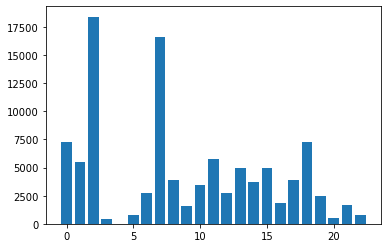

In [154]:
target = 'SalePrice'
features = df.columns[~(df.columns == 'SalePrice')]

X = df[features]
y = df[target]

X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.25, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

importance = lr.coef_

standardized = [x * X_train[col].std() for col, x in zip(X_train.columns, abs(importance))]

for i, v in enumerate(zip(X_train.columns, standardized)):
    # Multiply beta_ values by the column stdev to make them the same unit
    print(f'Feature: ({i}, {v[0]}), Score: {v[1]:.2f}')

plt.bar([x for x in range(len(standardized))], standardized)
plt.show()

In [79]:
X_train.columns

Index(['LotArea', '1stFlrSF', 'GrLivArea', 'RegularLotShape', 'LandIsLvl',
       'LotConfigCL', 'LotAdjacencyType', 'HouseCondition', 'YrBuilt',
       'WasRemodeled', 'VeneerType', 'HeatingQuality', 'EleSystem',
       'BsmtHasBath', 'HasHalfBath', 'Bedrooms', 'AdditionalRooms',
       'NumFireplaces', 'GarageAreaByCar', 'HasDeck', 'HasPool', 'MonthSold',
       'YearSold'],
      dtype='object')

In [117]:
# Normalized Importances

deviation = [X_train[col].std() for col in X_train.columns]

feat_imp = pd.DataFrame({'coef': importance,
                         'std': deviation,
                         'importance': standardized},
                        index=X_train.columns)
feat_imp['normalized'] = 100 * (feat_imp['importance'] / feat_imp['importance'].max())
feat_imp = feat_imp.sort_values(by=['normalized'], ascending=False)

In [118]:
feat_imp

,coef,std,importance,normalized
GrLivArea,46.761556,393.943397,18421.406131,100.000000
HouseCondition,35393.557931,0.469146,16604.733993,90.138255
LotArea,2.386475,3057.968260,7297.764363,39.615675
GarageAreaByCar,10626.632803,0.684535,7274.298164,39.488289
HeatingQuality,-6679.079814,0.868922,5803.598842,31.504646
1stFlrSF,18.588676,294.839698,5480.679566,29.751690
BsmtHasBath,10027.095129,0.498456,4998.062430,27.131818
Bedrooms,-7157.264223,0.691296,4947.791507,26.858924
NumFireplaces,6598.850903,0.592502,3909.834654,21.224409
YrBuilt,9699.417053,0.398051,3860.864384,20.958576


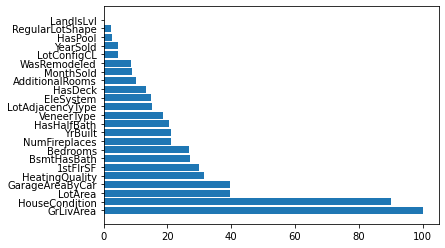

In [84]:
plt.barh(feat_imp.index, feat_imp['normalized'])
plt.show()

In [97]:
# Let's see if we can get a better score by only including features with a 20% importance or better

top20 = feat_imp.index[:10]

X = df[top20]
y = df[target]

print(X.shape, y.shape)

(1253, 10) (1253,)


In [98]:
# Train a model with these features

X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.25, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_val = lr.predict(X_val)
y_pred_test = lr.predict(X_test)

val_rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_val))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_test))

print(f'Validation RMSlogE: {val_rmsle}')
print(f'Test RMSlogE: {test_rmsle}')

Validation RMSlogE: 0.1738738352077565
Test RMSlogE: 0.17004378568358597


In [110]:
test = pd.read_csv('../test.csv')

df1 = test.copy()

condition0 = (len(df1) * 0.1)
cols = df1.columns

for col in cols:
    n_NaN = (df1[col].isna().sum())
    if n_NaN > condition0:
        df1.drop(columns=col, inplace=True)
    elif 0 < n_NaN < condition0:
        if df1[col].dtype != 'O':
            if len(df1[col].unique()) > 20:
                df1[col].fillna(value=df1[col].mean(), inplace=True)
            else:
                df1[col].fillna(value=df1[col].mode()[0], inplace=True)
        else:
            df1[col].fillna(value=df1[col].mode()[0], inplace=True)

cleaned = df1.copy() 

# 1. LotShape - (Combine Irregular)
cleaned.loc[cleaned['LotShape'].str.startswith('IR'), 'RegularLotShape'] = 0
cleaned.loc[cleaned['LotShape'].str.startswith('Reg'), 'RegularLotShape'] = 1

# 2. LandContour - (Combine non Lvl values)
cleaned.loc[(cleaned['LandContour'] == 'Bnk') | (cleaned['LandContour'] == 'HLS') | (cleaned['LandContour'] == 'Low'), 'LandIsLvl'] = 0
cleaned.loc[cleaned['LandContour'] == 'Lvl', 'LandIsLvl'] = 1

# 3. LotConfig - (FR2, FR3 essentially the same)
# Ordinality - {'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR': 3}
cleaned.loc[cleaned['LotConfig'] == 'Inside', 'LotConfigCL'] = 0
cleaned.loc[cleaned['LotConfig'] == 'Corner', 'LotConfigCL'] = 1
cleaned.loc[cleaned['LotConfig'] == 'CulDSac', 'LotConfigCL'] = 2
cleaned.loc[cleaned['LotConfig'].str.startswith('FR'), 'LotConfigCL'] = 3

# 4. Condition1 - (Combine adjacency types)
# Ordinality - {'Norm': 0, 'Feedr/Artery': 1, 'RRA/N': 2, 'PosFeat': 3}
cleaned.loc[cleaned['Condition1'] == 'Norm', 'LotAdjacencyType'] = 0
cleaned.loc[(cleaned['Condition1'] == 'Feedr') | (cleaned['Condition1'] == 'Artery'), 'LotAdjacencyType'] = 1
cleaned.loc[cleaned['Condition1'].str.startswith('RR'), 'LotAdjacencyType'] = 2
cleaned.loc[cleaned['Condition1'].str.startswith('Pos'), 'LotAdjacencyType'] = 3

# 5. OverallQual - (Combine extremes)
# Ordinality - {'below_4': 0, 'Average(4,5,6)': 1, 'above_6': 2}
cleaned.loc[cleaned['OverallQual'] < 4, 'HouseCondition'] = 0
cleaned.loc[cleaned['OverallQual'] <= 6, 'HouseCondition'] = 1
cleaned.loc[cleaned['OverallQual'] >= 7, 'HouseCondition'] = 2

# 6. YearBuilt - Split {MadeBefore1946: 0, MadeAfter1946: 1}
cleaned.loc[cleaned['YearBuilt'] < 1946, 'YrBuilt'] = 0
cleaned.loc[cleaned['YearBuilt'] >= 1946, 'YrBuilt'] = 1

# 7. YearRemodAdd - NEW COLUMN - WasRemodeled
# Process - If the years for YearBuilt and YearRemodAdd are the same, there was no remodel
cleaned.loc[cleaned['YearBuilt'] == cleaned['YearRemodAdd'], 'WasRemodeled'] = 0
cleaned.loc[cleaned['YearBuilt'] != cleaned['YearRemodAdd'], 'WasRemodeled'] = 1

# 8. MasVnrType - (Combine brick-types)
# Ordinality - {'None': 0, 'Brick': 1, 'Stone': 3}
cleaned.loc[cleaned['MasVnrType'] == 'None', 'VeneerType'] = 0
cleaned.loc[cleaned['MasVnrType'].str.startswith('Brk'), 'VeneerType'] = 1
cleaned.loc[cleaned['MasVnrType'] == 'Stone', 'VeneerType'] = 2

# 9. HeatingQC - (Combine Fair and Poor - heating is important!)
# Ordinality - {'Excellent': 0, 'Average': 1, 'Good': 2, 'Poor': 3}
cleaned.loc[cleaned['HeatingQC'] == 'Ex', 'HeatingQuality'] = 0
cleaned.loc[cleaned['HeatingQC'] == 'TA', 'HeatingQuality'] = 1
cleaned.loc[cleaned['HeatingQC'] == 'Gd', 'HeatingQuality'] = 2
cleaned.loc[(cleaned['HeatingQC'] == 'Fa') | (cleaned['HeatingQC'] == 'Po'), 'HeatingQuality'] = 3

# 10. Electrical - (Combine all Fuse types)
# Binary - {'Breaker': 0, 'Fuse': 1}
cleaned.loc[cleaned['Electrical'] == 'SBrkr', 'EleSystem'] = 0
cleaned.loc[(cleaned['Electrical'].str.startswith('Fuse')) | (cleaned['Electrical'] == 'Mix'), 'EleSystem'] = 1

# 11. BsmtFull/HalfBath - NEW COLUMN - BsmtHasBath
cleaned.loc[(cleaned['BsmtFullBath'] == 0) | (cleaned['BsmtHalfBath'] == 0), 'BsmtHasBath'] = 0
cleaned.loc[(cleaned['BsmtFullBath'] > 0) | (cleaned['BsmtHalfBath'] > 0), 'BsmtHasBath'] = 1

# 12. HalfBath - (Combine 1 and 2 to make binary) - HasHalfBath
cleaned.loc[cleaned['HalfBath'] == 0, 'HasHalfBath'] = 0
cleaned.loc[cleaned['HalfBath'] > 0, 'HasHalfBath'] = 1

# 13. BedroomAbvGr - (0-1, 2, 3, 4+)
# Ordinality - {'less_than_2': 0, '2': 1, '3': 2, '4+': 3}
cleaned.loc[cleaned['BedroomAbvGr'] < 2, 'Bedrooms'] = 0
cleaned.loc[cleaned['BedroomAbvGr'] == 2, 'Bedrooms'] = 1
cleaned.loc[cleaned['BedroomAbvGr'] == 3, 'Bedrooms'] = 2
cleaned.loc[cleaned['BedroomAbvGr'] > 3, 'Bedrooms'] = 3

# 14. TotRmsAvbGrd - NEW COLUMN - AdditionalRooms
# Make a new column called RemainingRooms that is the difference between Total Rooms and Bedrooms
# Ordinality - {'less_than_3': 0, '3': 1, '4': 2, '5': 3, 'more_than_5': 4}
cleaned['RemainingRooms'] = cleaned['TotRmsAbvGrd'] - cleaned['BedroomAbvGr']
cleaned.loc[cleaned['RemainingRooms'] < 3, 'AdditionalRooms'] = 0
cleaned.loc[cleaned['RemainingRooms'] == 3, 'AdditionalRooms'] = 1
cleaned.loc[cleaned['RemainingRooms'] == 4, 'AdditionalRooms'] = 2
cleaned.loc[cleaned['RemainingRooms'] == 5, 'AdditionalRooms'] = 3
cleaned.loc[cleaned['RemainingRooms'] > 5, 'AdditionalRooms'] = 4

# 15. Fireplaces - (Combine 2 and 3)
# Ordinality - {'None': 0, '1': 1, '2+': 2}
cleaned.loc[cleaned['Fireplaces'] == 0, 'NumFireplaces'] = 0
cleaned.loc[cleaned['Fireplaces'] == 1, 'NumFireplaces'] = 1
cleaned.loc[cleaned['Fireplaces'] > 1, 'NumFireplaces'] = 2

# 16. GarageCars - (Combine 3 and 4)
# Ordinality - {'0': 0, '1': 1, '2': 2, '3+': 3}
cleaned.loc[cleaned['GarageCars'] == 0, 'GarageAreaByCar'] = 0
cleaned.loc[cleaned['GarageCars'] == 1, 'GarageAreaByCar'] = 1
cleaned.loc[cleaned['GarageCars'] == 2, 'GarageAreaByCar'] = 2
cleaned.loc[cleaned['GarageCars'] > 2, 'GarageAreaByCar'] = 3

# 17. WoodDeckSF - NEW COLUMN - HasDeck
cleaned.loc[cleaned['WoodDeckSF'] == 0, 'HasDeck'] = 0
cleaned.loc[cleaned['WoodDeckSF'] > 0, 'HasDeck'] = 1

# 18. PoolArea - NEW COLUMN - HasPool
cleaned.loc[cleaned['PoolArea'] == 0, 'HasPool'] = 0
cleaned.loc[cleaned['PoolArea'] > 0, 'HasPool'] = 1

# 19. MoSold - Subtract all items by 1
# Ordinality - {'Jan': 0 ... 'Dec': 11}
cleaned['MonthSold'] = cleaned['MoSold'] - 1

# 20. YrSold - Convert years to 0-4 - 2010 might not have concluded at creation of dataset
# Ordinality - {'2006': 0, '2007': 1, '2008': 2, '2009': 3, '2010': 4}
cleaned.loc[cleaned['YrSold'] <= 2006, 'YearSold'] = 0
cleaned.loc[cleaned['YrSold'] == 2007, 'YearSold'] = 1
cleaned.loc[cleaned['YrSold'] == 2008, 'YearSold'] = 2
cleaned.loc[cleaned['YrSold'] == 2009, 'YearSold'] = 3
cleaned.loc[cleaned['YrSold'] == 2010, 'YearSold'] = 4

new_columns = list(cleaned.columns[-21:])

features_encoded = cleaned[new_columns].astype('int64')

df_inter = pd.concat([cleaned[['Id', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']], features_encoded], axis=1)

df_inter.drop(columns=['TotalBsmtSF', 'RemainingRooms'], inplace=True)

df_top20 = df_inter[['Id'] + list(top20)]

IDs = df_top20['Id']

x = df_top20[df_top20.columns[1:]]

y_predict = lr.predict(x)

submission_top20 = pd.DataFrame({'Id': IDs, 'SalePrice': y_predict})
submission_top20.head()

,Id,SalePrice
0,1461,117799.567659
1,1462,144283.882888
2,1463,165516.052452
3,1464,169724.665385
4,1465,184622.462594


In [112]:
# submission_top20.to_csv('../kaggle_submissions/cleaned_submission_feat_imp0.csv', index=False)

In [ ]:
# Submission scored 0.20777 which was NOT an improvement

In [156]:
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

y_pred_val = gbr.predict(X_val)
y_pred_test = gbr.predict(X_test)

rmsle_val = np.sqrt(mean_squared_log_error(y_val, y_pred_val))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))

print(f'Validation RMSLE GradientBoostingRegressor: {rmsle_val}')
print(f'Test RMSLE GradientBoostingRegressor: {rmsle_test}')

Validation RMSLE GradientBoostingRegressor: 0.15924007578137903
Test RMSLE GradientBoostingRegressor: 0.1603613614633617


In [128]:
test = pd.read_csv('../test.csv')

df1 = test.copy()

condition0 = (len(df1) * 0.1)
cols = df1.columns

for col in cols:
    n_NaN = (df1[col].isna().sum())
    if n_NaN > condition0:
        df1.drop(columns=col, inplace=True)
    elif 0 < n_NaN < condition0:
        if df1[col].dtype != 'O':
            if len(df1[col].unique()) > 20:
                df1[col].fillna(value=df1[col].mean(), inplace=True)
            else:
                df1[col].fillna(value=df1[col].mode()[0], inplace=True)
        else:
            df1[col].fillna(value=df1[col].mode()[0], inplace=True)

cleaned = df1.copy() 

# 1. LotShape - (Combine Irregular)
cleaned.loc[cleaned['LotShape'].str.startswith('IR'), 'RegularLotShape'] = 0
cleaned.loc[cleaned['LotShape'].str.startswith('Reg'), 'RegularLotShape'] = 1

# 2. LandContour - (Combine non Lvl values)
cleaned.loc[(cleaned['LandContour'] == 'Bnk') | (cleaned['LandContour'] == 'HLS') | (cleaned['LandContour'] == 'Low'), 'LandIsLvl'] = 0
cleaned.loc[cleaned['LandContour'] == 'Lvl', 'LandIsLvl'] = 1

# 3. LotConfig - (FR2, FR3 essentially the same)
# Ordinality - {'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR': 3}
cleaned.loc[cleaned['LotConfig'] == 'Inside', 'LotConfigCL'] = 0
cleaned.loc[cleaned['LotConfig'] == 'Corner', 'LotConfigCL'] = 1
cleaned.loc[cleaned['LotConfig'] == 'CulDSac', 'LotConfigCL'] = 2
cleaned.loc[cleaned['LotConfig'].str.startswith('FR'), 'LotConfigCL'] = 3

# 4. Condition1 - (Combine adjacency types)
# Ordinality - {'Norm': 0, 'Feedr/Artery': 1, 'RRA/N': 2, 'PosFeat': 3}
cleaned.loc[cleaned['Condition1'] == 'Norm', 'LotAdjacencyType'] = 0
cleaned.loc[(cleaned['Condition1'] == 'Feedr') | (cleaned['Condition1'] == 'Artery'), 'LotAdjacencyType'] = 1
cleaned.loc[cleaned['Condition1'].str.startswith('RR'), 'LotAdjacencyType'] = 2
cleaned.loc[cleaned['Condition1'].str.startswith('Pos'), 'LotAdjacencyType'] = 3

# 5. OverallQual - (Combine extremes)
# Ordinality - {'below_4': 0, 'Average(4,5,6)': 1, 'above_6': 2}
cleaned.loc[cleaned['OverallQual'] < 4, 'HouseCondition'] = 0
cleaned.loc[cleaned['OverallQual'] <= 6, 'HouseCondition'] = 1
cleaned.loc[cleaned['OverallQual'] >= 7, 'HouseCondition'] = 2

# 6. YearBuilt - Split {MadeBefore1946: 0, MadeAfter1946: 1}
cleaned.loc[cleaned['YearBuilt'] < 1946, 'YrBuilt'] = 0
cleaned.loc[cleaned['YearBuilt'] >= 1946, 'YrBuilt'] = 1

# 7. YearRemodAdd - NEW COLUMN - WasRemodeled
# Process - If the years for YearBuilt and YearRemodAdd are the same, there was no remodel
cleaned.loc[cleaned['YearBuilt'] == cleaned['YearRemodAdd'], 'WasRemodeled'] = 0
cleaned.loc[cleaned['YearBuilt'] != cleaned['YearRemodAdd'], 'WasRemodeled'] = 1

# 8. MasVnrType - (Combine brick-types)
# Ordinality - {'None': 0, 'Brick': 1, 'Stone': 3}
cleaned.loc[cleaned['MasVnrType'] == 'None', 'VeneerType'] = 0
cleaned.loc[cleaned['MasVnrType'].str.startswith('Brk'), 'VeneerType'] = 1
cleaned.loc[cleaned['MasVnrType'] == 'Stone', 'VeneerType'] = 2

# 9. HeatingQC - (Combine Fair and Poor - heating is important!)
# Ordinality - {'Excellent': 0, 'Average': 1, 'Good': 2, 'Poor': 3}
cleaned.loc[cleaned['HeatingQC'] == 'Ex', 'HeatingQuality'] = 0
cleaned.loc[cleaned['HeatingQC'] == 'TA', 'HeatingQuality'] = 1
cleaned.loc[cleaned['HeatingQC'] == 'Gd', 'HeatingQuality'] = 2
cleaned.loc[(cleaned['HeatingQC'] == 'Fa') | (cleaned['HeatingQC'] == 'Po'), 'HeatingQuality'] = 3

# 10. Electrical - (Combine all Fuse types)
# Binary - {'Breaker': 0, 'Fuse': 1}
cleaned.loc[cleaned['Electrical'] == 'SBrkr', 'EleSystem'] = 0
cleaned.loc[(cleaned['Electrical'].str.startswith('Fuse')) | (cleaned['Electrical'] == 'Mix'), 'EleSystem'] = 1

# 11. BsmtFull/HalfBath - NEW COLUMN - BsmtHasBath
cleaned.loc[(cleaned['BsmtFullBath'] == 0) | (cleaned['BsmtHalfBath'] == 0), 'BsmtHasBath'] = 0
cleaned.loc[(cleaned['BsmtFullBath'] > 0) | (cleaned['BsmtHalfBath'] > 0), 'BsmtHasBath'] = 1

# 12. HalfBath - (Combine 1 and 2 to make binary) - HasHalfBath
cleaned.loc[cleaned['HalfBath'] == 0, 'HasHalfBath'] = 0
cleaned.loc[cleaned['HalfBath'] > 0, 'HasHalfBath'] = 1

# 13. BedroomAbvGr - (0-1, 2, 3, 4+)
# Ordinality - {'less_than_2': 0, '2': 1, '3': 2, '4+': 3}
cleaned.loc[cleaned['BedroomAbvGr'] < 2, 'Bedrooms'] = 0
cleaned.loc[cleaned['BedroomAbvGr'] == 2, 'Bedrooms'] = 1
cleaned.loc[cleaned['BedroomAbvGr'] == 3, 'Bedrooms'] = 2
cleaned.loc[cleaned['BedroomAbvGr'] > 3, 'Bedrooms'] = 3

# 14. TotRmsAvbGrd - NEW COLUMN - AdditionalRooms
# Make a new column called RemainingRooms that is the difference between Total Rooms and Bedrooms
# Ordinality - {'less_than_3': 0, '3': 1, '4': 2, '5': 3, 'more_than_5': 4}
cleaned['RemainingRooms'] = cleaned['TotRmsAbvGrd'] - cleaned['BedroomAbvGr']
cleaned.loc[cleaned['RemainingRooms'] < 3, 'AdditionalRooms'] = 0
cleaned.loc[cleaned['RemainingRooms'] == 3, 'AdditionalRooms'] = 1
cleaned.loc[cleaned['RemainingRooms'] == 4, 'AdditionalRooms'] = 2
cleaned.loc[cleaned['RemainingRooms'] == 5, 'AdditionalRooms'] = 3
cleaned.loc[cleaned['RemainingRooms'] > 5, 'AdditionalRooms'] = 4

# 15. Fireplaces - (Combine 2 and 3)
# Ordinality - {'None': 0, '1': 1, '2+': 2}
cleaned.loc[cleaned['Fireplaces'] == 0, 'NumFireplaces'] = 0
cleaned.loc[cleaned['Fireplaces'] == 1, 'NumFireplaces'] = 1
cleaned.loc[cleaned['Fireplaces'] > 1, 'NumFireplaces'] = 2

# 16. GarageCars - (Combine 3 and 4)
# Ordinality - {'0': 0, '1': 1, '2': 2, '3+': 3}
cleaned.loc[cleaned['GarageCars'] == 0, 'GarageAreaByCar'] = 0
cleaned.loc[cleaned['GarageCars'] == 1, 'GarageAreaByCar'] = 1
cleaned.loc[cleaned['GarageCars'] == 2, 'GarageAreaByCar'] = 2
cleaned.loc[cleaned['GarageCars'] > 2, 'GarageAreaByCar'] = 3

# 17. WoodDeckSF - NEW COLUMN - HasDeck
cleaned.loc[cleaned['WoodDeckSF'] == 0, 'HasDeck'] = 0
cleaned.loc[cleaned['WoodDeckSF'] > 0, 'HasDeck'] = 1

# 18. PoolArea - NEW COLUMN - HasPool
cleaned.loc[cleaned['PoolArea'] == 0, 'HasPool'] = 0
cleaned.loc[cleaned['PoolArea'] > 0, 'HasPool'] = 1

# 19. MoSold - Subtract all items by 1
# Ordinality - {'Jan': 0 ... 'Dec': 11}
cleaned['MonthSold'] = cleaned['MoSold'] - 1

# 20. YrSold - Convert years to 0-4 - 2010 might not have concluded at creation of dataset
# Ordinality - {'2006': 0, '2007': 1, '2008': 2, '2009': 3, '2010': 4}
cleaned.loc[cleaned['YrSold'] <= 2006, 'YearSold'] = 0
cleaned.loc[cleaned['YrSold'] == 2007, 'YearSold'] = 1
cleaned.loc[cleaned['YrSold'] == 2008, 'YearSold'] = 2
cleaned.loc[cleaned['YrSold'] == 2009, 'YearSold'] = 3
cleaned.loc[cleaned['YrSold'] == 2010, 'YearSold'] = 4

new_columns = list(cleaned.columns[-21:])

features_encoded = cleaned[new_columns].astype('int64')

df_inter = pd.concat([cleaned[['Id', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']], features_encoded], axis=1)

df_inter.drop(columns=['TotalBsmtSF', 'RemainingRooms'], inplace=True)

IDs = df_inter['Id']

x = df_inter[df_inter.columns[1:]]

y_predict = gbr.predict(x)

submission_gbr = pd.DataFrame({'Id': IDs, 'SalePrice': y_predict})
submission_gbr.head()

,Id,SalePrice
0,1461,111112.525624
1,1462,143137.372090
2,1463,167837.538414
3,1464,179904.448425
4,1465,174261.567417


In [129]:
# submission_gbr.to_csv('../kaggle_submissions/gradient_boosting_default.csv', index=False)

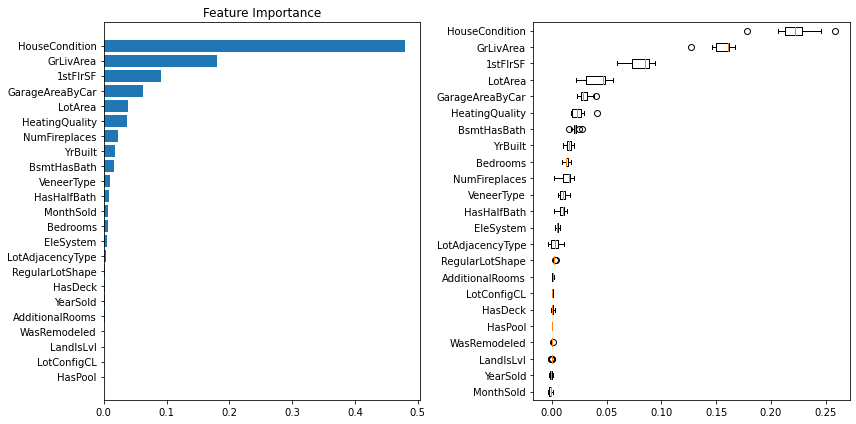

In [157]:
feat_importances = gbr.feature_importances_
sorted_idx = np.argsort(feat_importances)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.barh(pos, feat_importances[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                               random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1,2,2)
plt.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(X_train.columns)[sorted_idx])
fig.tight_layout()
plt.show()

In [158]:
len(feat_importances)

23

In [190]:
top_feats = X_train.columns[sorted_idx][8:]

X_train_gbr = X_train[top_feats]
X_val_gbr = X_val[top_feats]
X_test_gbr = X_test[top_feats]

gbr.fit(X_train_gbr, y_train)

y_pred_val = gbr.predict(X_val_gbr)
y_pred_test = gbr.predict(X_test_gbr)

rmsle_val = np.sqrt(mean_squared_log_error(y_val, y_pred_val))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))

print(f'Validation RMSLE GradientBoostingRegressor: {rmsle_val}')
print(f'Test RMSLE GradientBoostingRegressor: {rmsle_test}')

Validation RMSLE GradientBoostingRegressor: 0.15902278237293369
Test RMSLE GradientBoostingRegressor: 0.15554931786142148


In [192]:
y_pred1 = gbr.predict(x[top_feats])

submission_gbr1 = pd.DataFrame({'Id': IDs, 'SalePrice': y_pred1})
submission_gbr1.head()

,Id,SalePrice
0,1461,111190.678268
1,1462,144719.893783
2,1463,171255.966341
3,1464,177970.074251
4,1465,177319.881678


In [149]:
# submission_gbr1.to_csv('../kaggle_submissions/gbr_permutation_importances.csv', index=False)